<a href="https://colab.research.google.com/github/GonBla/MSADS_CapstoneProject/blob/main/Code/ColabNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install kaggle

In [ ]:
#!pip install tensorflow

## 1. Packages

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

## 2. Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import
train = pd.read_csv('/content/drive/MyDrive/ADS-599/DATASET/train.csv', parse_dates=['date'])
test = pd.read_csv('/content/drive/MyDrive/ADS-599/DATASET/test.csv', parse_dates=['date'])
stores = pd.read_csv('/content/drive/MyDrive/ADS-599/DATASET/stores.csv')
oil = pd.read_csv('/content/drive/MyDrive/ADS-599/DATASET/oil.csv', parse_dates=['date'])
holidays_events = pd.read_csv('/content/drive/MyDrive/ADS-599/DATASET/holidays_events.csv', parse_dates=['date'])
transactions = pd.read_csv('/content/drive/MyDrive/ADS-599/DATASET/transactions.csv', parse_dates=['date'])
# sample_submission = pd.read_csv('/content/drive/MyDrive/ADS-599/Module3/DATASET/sample_submission.csv')
weather = pd.read_excel('/content/drive/MyDrive/ADS-599/DATASET/Weather_Cities.xlsx')

train.head()

id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0

## 3. Transactions

In [ ]:
transactions.head(10)

date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922
5 2013-01-02          5          1903
6 2013-01-02          6          2143
7 2013-01-02          7          1874
8 2013-01-02          8          3250
9 2013-01-02          9          2940

### Spearman Correlation Plot

In [ ]:
# This code was supported with the help of GitHub Copilot
temp = pd.merge(train.groupby(["date", "store_nbr"]).sales.sum().reset_index(), transactions, how = "left")
print("Spearman Correlation between Total Sales and Transactions: {:,.4f}".format(temp.corr("spearman").sales.loc["transactions"]))
px.line(transactions.sort_values(["store_nbr", "date"]), x='date', y='transactions', color='store_nbr',title = "Transactions" )

Spearman Correlation between Total Sales and Transactions: 0.8175


Computes and displays the Spearman correlation between total sales and transactions (0.8175), suggesting a strong positive relationship.

A line plot (px.line) shows transactions across different stores over time, helping identify transaction trends and seasonal patterns for each store.

### Transactions Box Plot by Month and Year

In [ ]:
# This code was supported with the help of GitHub Copilot
a = transactions.copy()
a["year"] = a.date.dt.year
a["month"] = a.date.dt.month
px.box(a, x="year", y="transactions" , color = "month", title = "Transactions")

A box plot categorizes transactions by year and month, allowing comparison of monthly transaction variations across years.

### Monthly Average Transactions

In [ ]:
a = transactions.set_index("date").resample("M").transactions.mean().reset_index()
a["year"] = a.date.dt.year
px.line(a, x='date', y='transactions', color='year',title = "Monthly Average Transactions" )

A line plot displays monthly average transactions, highlighting seasonal transaction patterns over multiple years.

### Scatter Plot of Sales vs. Transactions

In [ ]:

px.scatter(temp, x = "transactions", y = "sales", trendline = "ols", trendline_color_override = "red")

This scatter plot with an overlaid trend line (using OLS regression) shows the relationship between transactions and sales, reinforcing the correlation observed earlier

### Average Transactions by Day of the Week

In [ ]:
a = transactions.copy()
a["year"] = a.date.dt.year
a["dayofweek"] = a.date.dt.dayofweek+1
a = a.groupby(["year", "dayofweek"]).transactions.mean().reset_index()
px.line(a, x="dayofweek", y="transactions" , color = "year", title = "Transactions")

This line plot groups transactions by day of the week and year, showing how weekly patterns may vary annually.

##3. Data Exploration

### Distribution of Sale

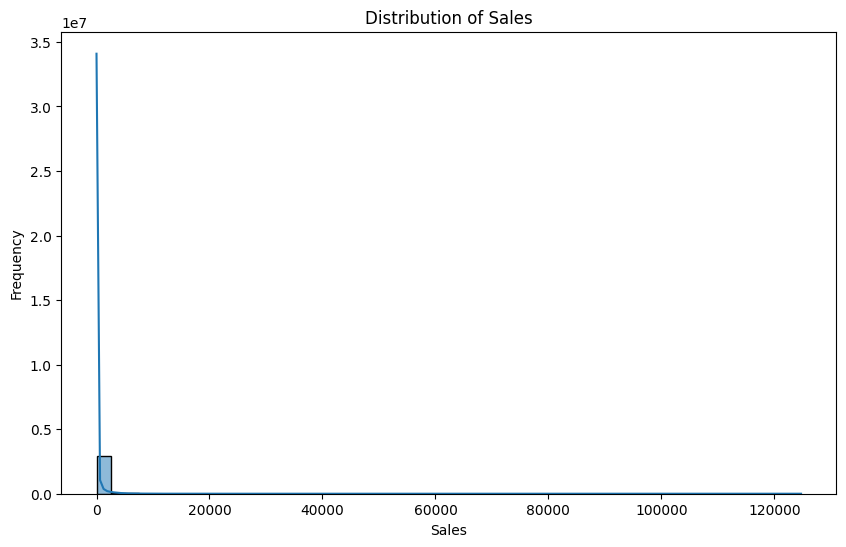

In [ ]:
# Distribution of Sales
plt.figure(figsize=(10,6))
sns.histplot(train['sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

A histogram with a KDE (Kernel Density Estimate) displays the distribution of sales. This plot helps identify any skewness in the sales data and the typical sales volume.

### Missing Values

In [ ]:
# This code was supported with the help of GitHub Copilot
# Function to Check Missing Values
def missing_values(df, name):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if not missing.empty:
        print(f"Missing values in {name}:")
        print(missing)
        print("\n")
    else:
        print(f"No missing values in {name}.\n")

# Check Missing Values
missing_values(train, 'train.csv')
missing_values(test, 'test.csv')
missing_values(stores, 'stores.csv')
missing_values(oil, 'oil.csv')
missing_values(holidays_events, 'holidays_events.csv')
missing_values(transactions, 'transactions.csv')
#missing_values(sample_submission, 'sample_submission.csv')

No missing values in train.csv.

No missing values in test.csv.

No missing values in stores.csv.

Missing values in oil.csv:
dcoilwtico    43
dtype: int64


No missing values in holidays_events.csv.

No missing values in transactions.csv.



A custom function checks each dataset for missing values. The oil dataset has missing values in the dcoilwtico column, which would need imputation or handling before analysis.

##3.1 Clean Oil Dataset

In [ ]:
oil[oil['dcoilwtico'].isna()]


date  dcoilwtico
0    2013-01-01         NaN
14   2013-01-21         NaN
34   2013-02-18         NaN
63   2013-03-29         NaN
104  2013-05-27         NaN
132  2013-07-04         NaN
174  2013-09-02         NaN
237  2013-11-28         NaN
256  2013-12-25         NaN
261  2014-01-01         NaN
274  2014-01-20         NaN
294  2014-02-17         NaN
338  2014-04-18         NaN
364  2014-05-26         NaN
393  2014-07-04         NaN
434  2014-09-01         NaN
497  2014-11-27         NaN
517  2014-12-25         NaN
522  2015-01-01         NaN
534  2015-01-19         NaN
554  2015-02-16         NaN
588  2015-04-03         NaN
624  2015-05-25         NaN
653  2015-07-03         NaN
699  2015-09-07         NaN
757  2015-11-26         NaN
778  2015-12-25         NaN
783  2016-01-01         NaN
794  2016-01-18         NaN
814  2016-02-15         NaN
843  2016-03-25         NaN
889  2016-05-30         NaN
914  2016-07-04         NaN
959  2016-09-05         NaN
1017 2016-11-24         NaN
1039 2016-12-26         NaN
1044 2017-01-02         NaN
1054 2017-01-16         NaN
1079 2017-02-20         NaN
1118 2017-04-14         NaN
1149 2017-05-29         NaN
1174 2017-07-03         NaN
1175 2017-07-04         NaN

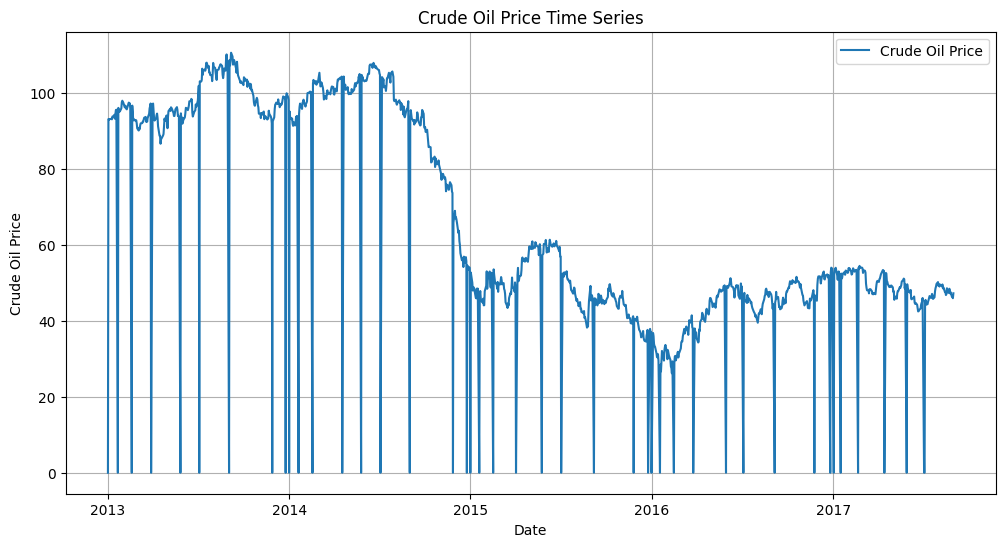

In [ ]:
def plot_oil_with_nan(oil):
    """
    Plot oil prices with NaN values replaced by 0.
    This function does not modify the original DataFrame.
    """
    # Plot the 'date' against 'dcoilwtico' as a line graph
    plt.figure(figsize=(12, 6))
    plt.plot(oil['date'], oil['dcoilwtico'].fillna(0), label='Crude Oil Price')
    plt.xlabel('Date')
    plt.ylabel('Crude Oil Price')
    plt.title('Crude Oil Price Time Series')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function
plot_oil_with_nan(oil)

In [ ]:
# Fill missing values with forward fill first, then backfill any remaining gaps
oil['dcoilwtico'] = oil['dcoilwtico'].fillna(method='ffill').fillna(method='bfill')


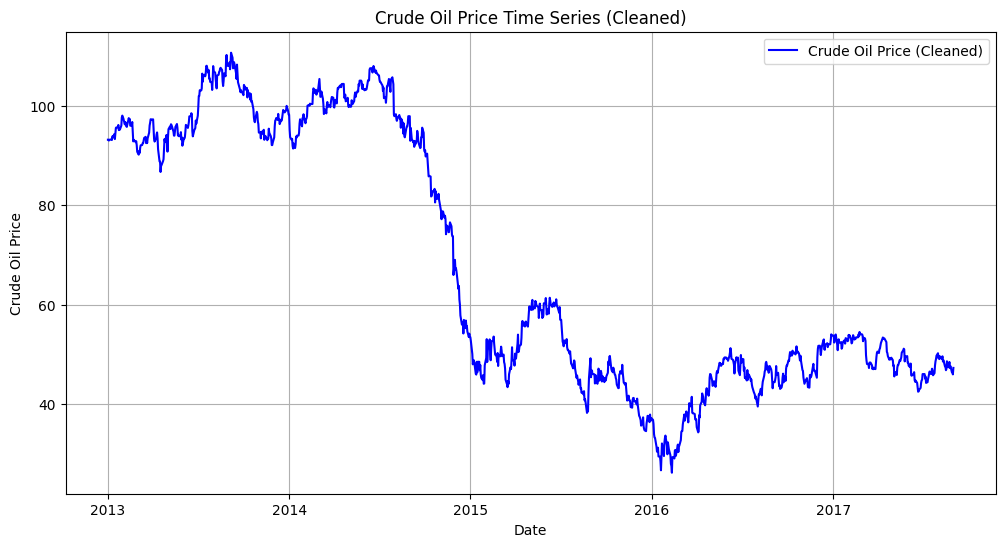

In [ ]:
# Plot the cleaned time series data
plt.figure(figsize=(12, 6))
plt.plot(oil['date'], oil['dcoilwtico'], label='Crude Oil Price (Cleaned)', color='blue')
plt.xlabel('Date')
plt.ylabel('Crude Oil Price')
plt.title('Crude Oil Price Time Series (Cleaned)')
plt.legend()
plt.grid(True)
plt.show()

A line plot of daily oil prices provides a time-series view of oil prices. This is important for understanding how external economic factors like oil prices could affect sales.

##4. Data Visualization

## Sales Over Time

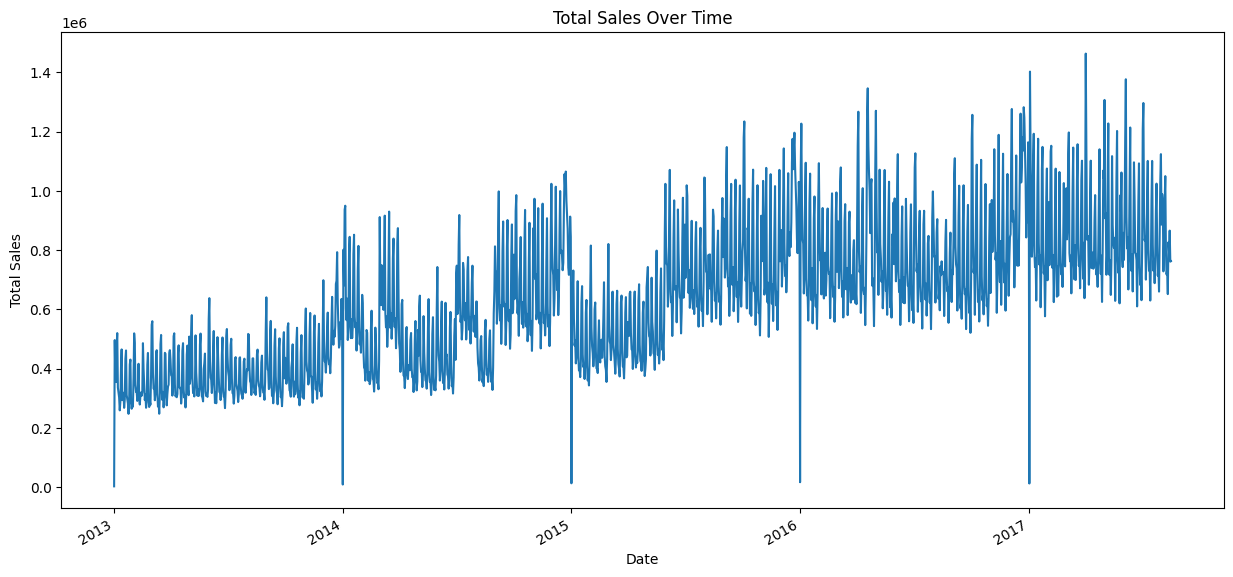

In [ ]:
plt.figure(figsize=(15,7))
train.groupby('date')['sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

A line plot showing the sum of sales over time. This visualization helps observe long-term sales trends, seasonality, and any outliers or abrupt changes.

### Sales by Store

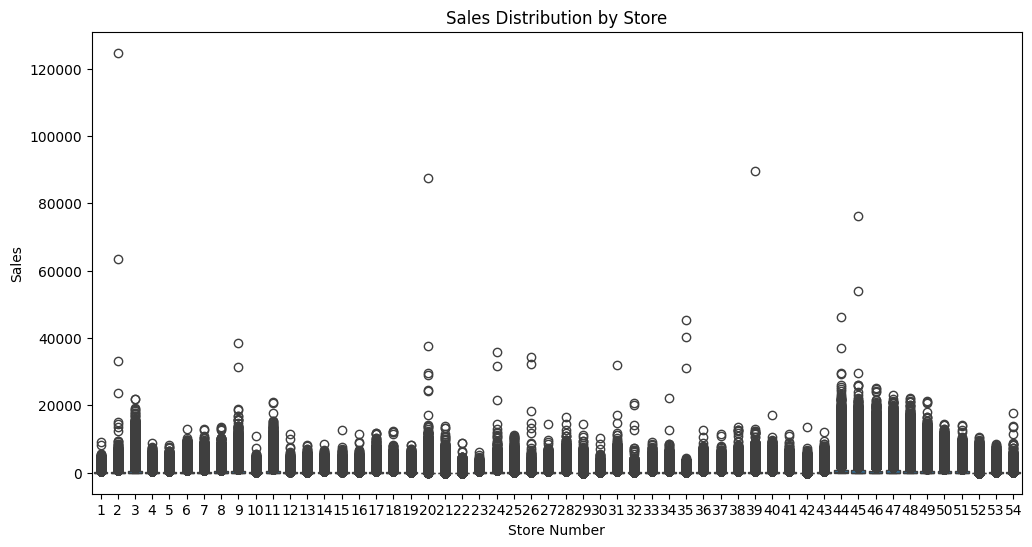

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='store_nbr', y='sales', data=train)
plt.title('Sales Distribution by Store')
plt.xlabel('Store Number')
plt.ylabel('Sales')
plt.show()

A box plot displays the distribution of sales by store, highlighting variations between stores, outliers, and general sales trends across locations.

#Correlation among Stores

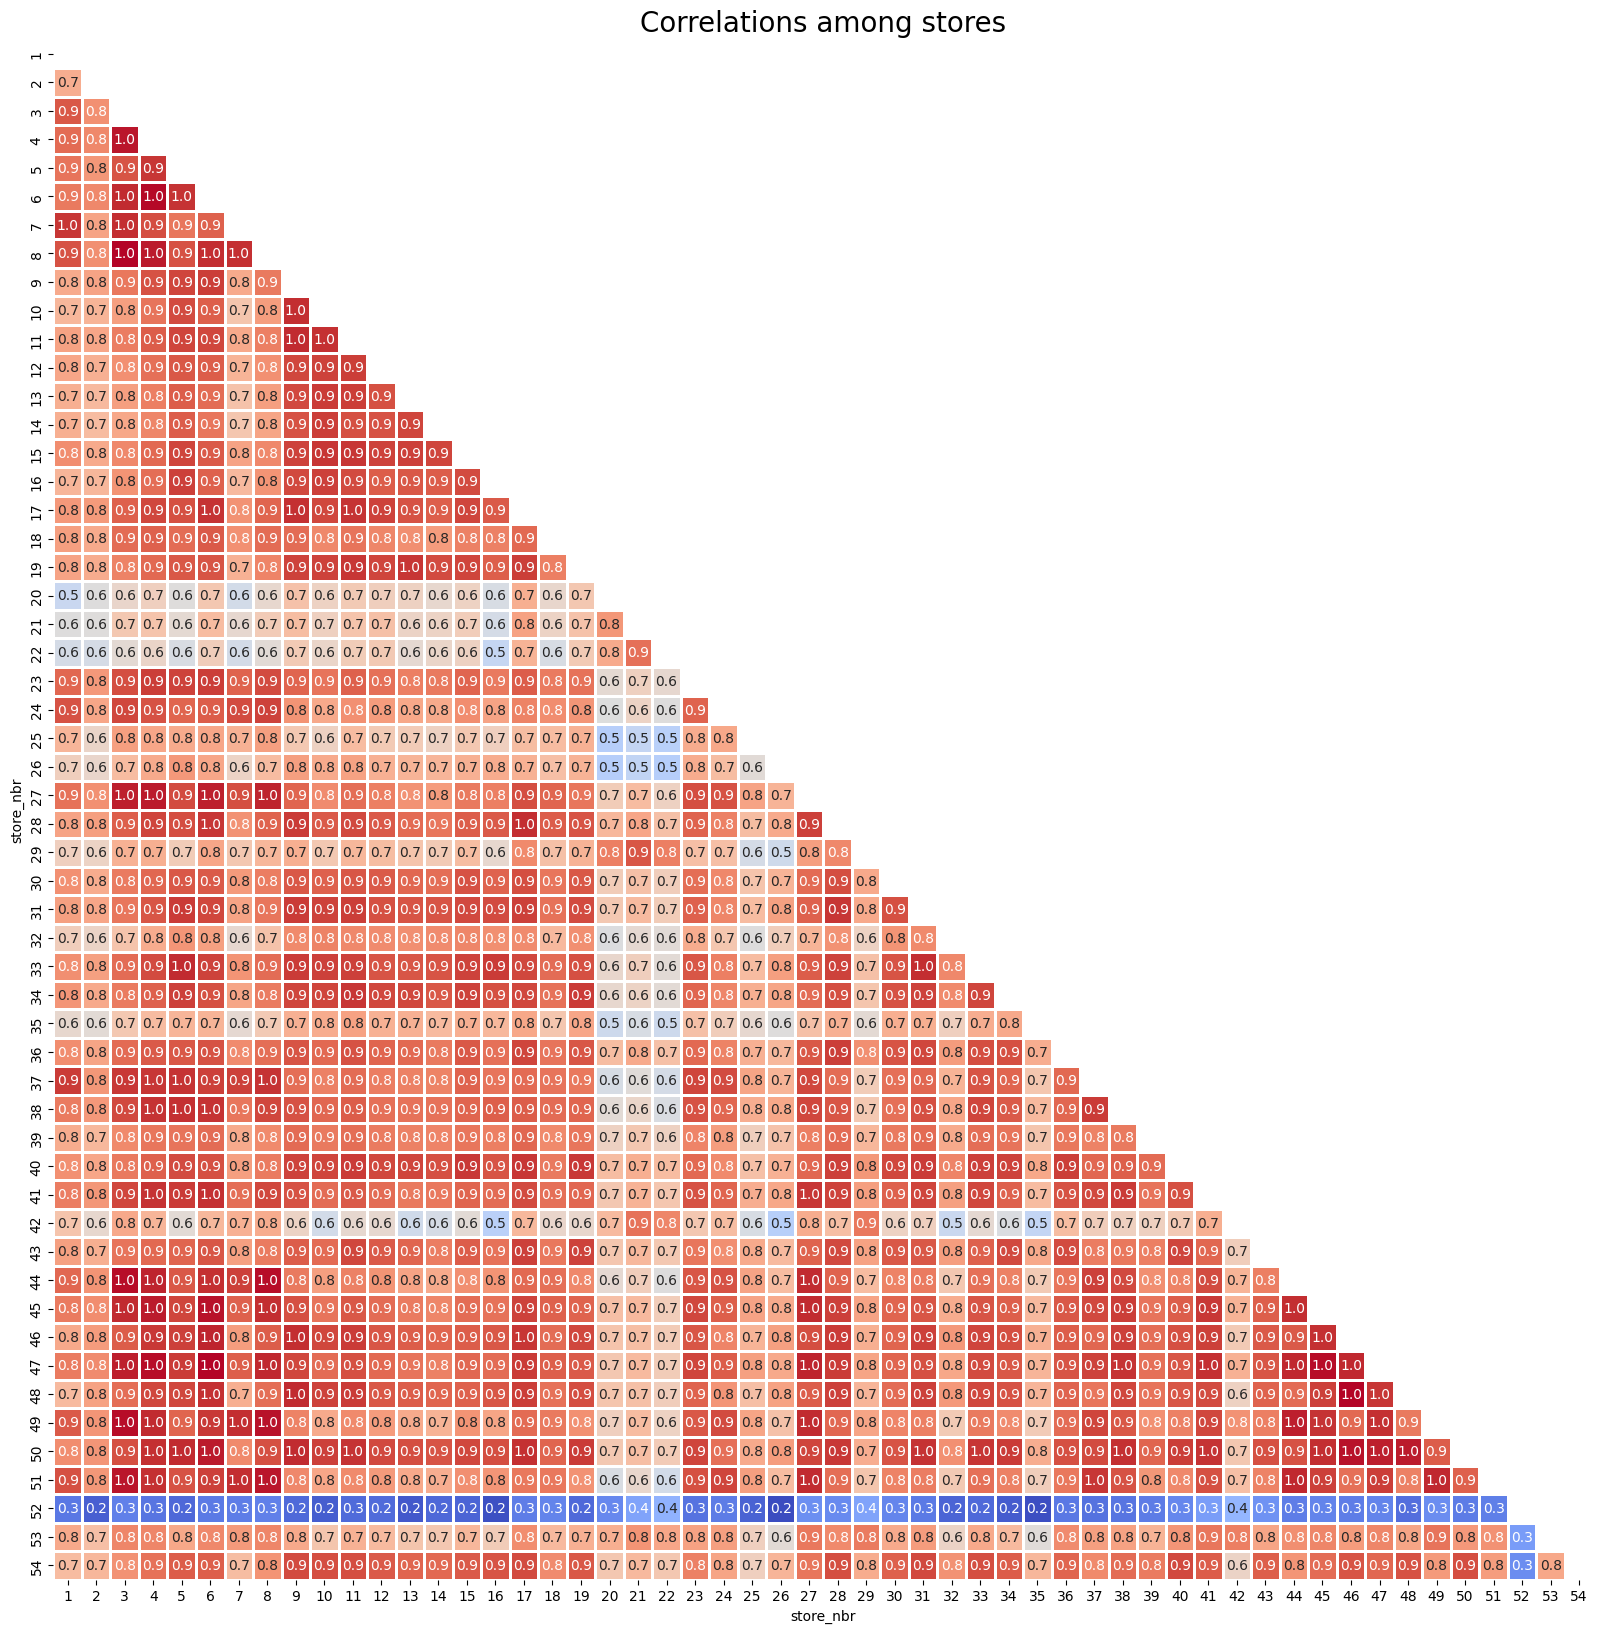

In [ ]:
a = train[["store_nbr", "sales"]]
a["ind"] = 1
a["ind"] = a.groupby("store_nbr").ind.cumsum().values
a = pd.pivot(a, index = "ind", columns = "store_nbr", values = "sales").corr()
mask = np.triu(a.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(a,
        annot=True,
        fmt='.1f',
        cmap='coolwarm',
        square=True,
        mask=mask,
        linewidths=1,
        cbar=False)
plt.title("Correlations among stores",fontsize = 20)
plt.show()

### Sales by Product Family

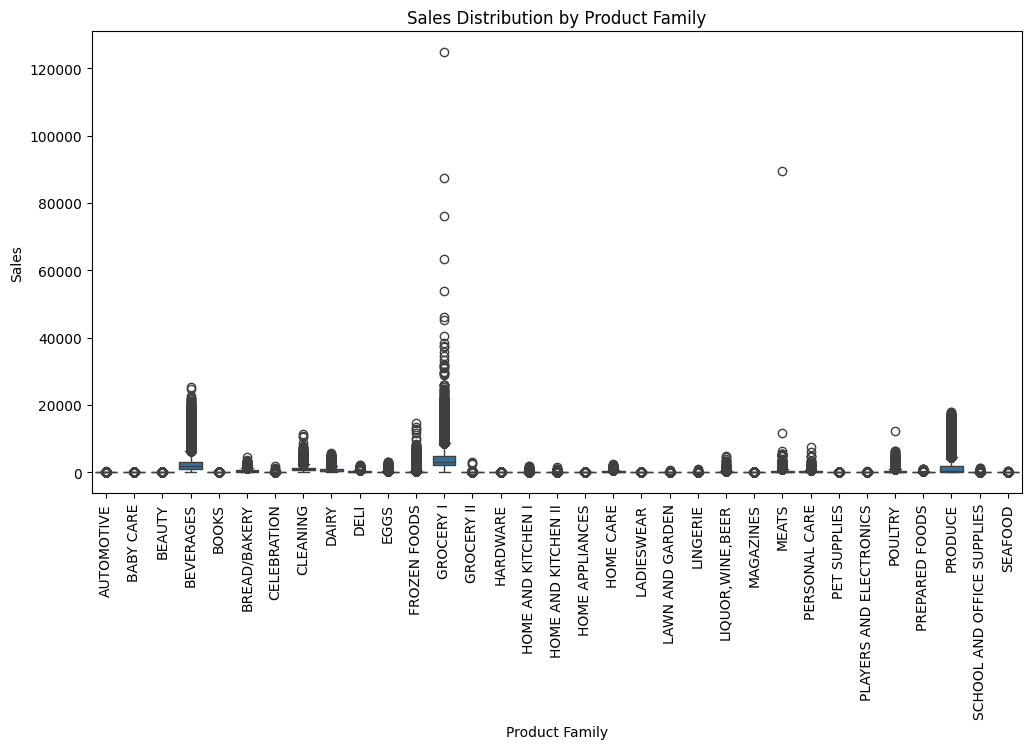

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='family', y='sales', data=train)
plt.title('Sales Distribution by Product Family')
plt.xlabel('Product Family')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

A box plot categorizes sales by product family. Rotating the x-axis labels aids readability, and the plot shows differences in sales performance across product types.

### Impact of Promotions on Sales

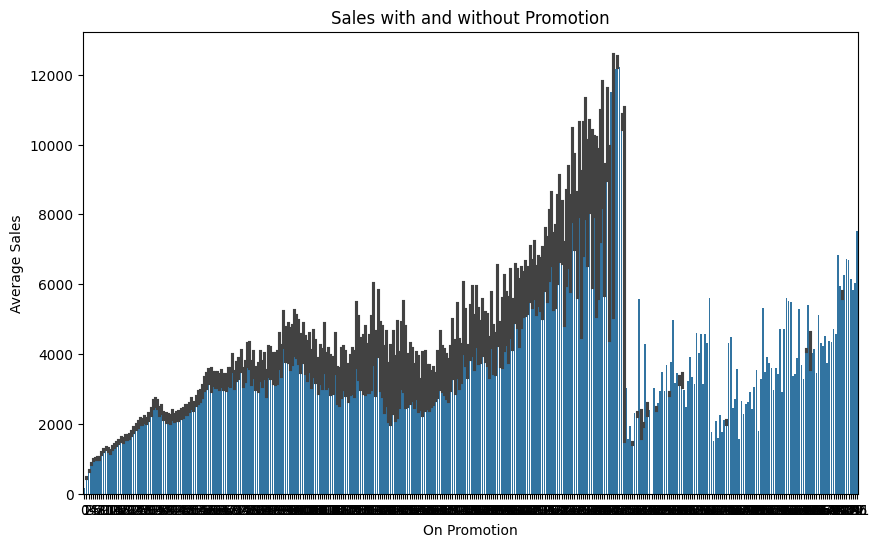

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='onpromotion', y='sales', data=train)
plt.title('Sales with and without Promotion')
plt.xlabel('On Promotion')
plt.ylabel('Average Sales')
plt.show()

A bar plot compares average sales with and without promotions, demonstrating promotions' impact on sales performance.

# Merge Datasets


Several dataset are merged to create the final dataset that will be used in the models.

In [ ]:
# Store Data
merged_st = pd.merge(train, stores, on='store_nbr', how='left')

In [ ]:
# Holiday Data
# Define different levels of holidays with a column
locale_priority = {'Local': 3, 'Regional': 2, 'National': 1}
holidays_events['holiday'] = holidays_events['locale'].map(locale_priority)

# Group by date, keeping the highest-priority holiday
consolidated_holidays = holidays_events.sort_values(
    by=['date', 'holiday'], ascending=[True, False]
).drop_duplicates(subset=['date'])

In [ ]:
# Merge with the previous dataset
merged_st_hd = pd.merge(merged_st, consolidated_holidays[['date', 'locale', 'locale_name']], on='date', how='left')

In [ ]:
# Mark the rows if they correspond to a holiday
merged_st_hd['is_holiday'] = (
    (merged_st_hd['locale'] == 'National') |
    ((merged_st_hd['locale'] == 'Regional') & (merged_st_hd['state'] == merged_st_hd['locale_name'])) |
    ((merged_st_hd['locale'] == 'Local') & (merged_st_hd['city'] == merged_st_hd['locale_name']))
)
merged_st_hd['is_holiday'] = merged_st_hd['is_holiday'].astype(int)

In [ ]:
# Oil Data
merged_st_hd_ol = pd.merge(merged_st_hd, oil, on='date', how='left')

## Weather Data


In [ ]:
weather.head(5)

name   datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  Ambato 2013-01-01     59.1     42.3  51.5          59.1          37.9   
1  Ambato 2013-01-02     60.8     44.3  51.6          60.8          39.1   
2  Ambato 2013-01-03     62.6     45.0  53.3          62.6          41.6   
3  Ambato 2013-01-04     66.2     45.2  54.4          66.2          41.5   
4  Ambato 2013-01-05     66.2     46.3  55.6          66.2          42.0   

   feelslike   dew  humidity  ...  snowdepth  windgust  windspeed winddir  \
0       50.5  46.6      84.5  ...        NaN       NaN       23.0   160.3   
1       50.5  48.9      90.6  ...        NaN       NaN       17.2   155.4   
2       52.1  48.8      85.9  ...        NaN       NaN       23.0   165.8   
3       53.8  50.2      86.9  ...        NaN       NaN       24.2   164.0   
4       54.9  49.7      82.5  ...        NaN       NaN       20.8   165.3   

   sealevelpressure cloudcover  visibility  solarradiation  solarenergy  \
0            1024.4       85.8         6.3           210.9         18.2   
1            1023.4       77.8         5.5           223.5         19.2   
2            1026.6       79.5         5.2           199.7         17.3   
3            1026.7       73.5         5.6           212.8         18.3   
4            1026.8       77.6         6.4           234.4         20.3   

   uvindex  
0        7  
1        8  
2        7  
3        8  
4        8  

[5 rows x 25 columns]

In [ ]:
# Missing values
weather.isna().sum()

name                    0
datetime                0
tempmax                 0
tempmin                 0
temp                    0
feelslikemax            0
feelslikemin            0
feelslike               0
dew                     0
humidity                0
precip                  0
precipprob              0
precipcover             0
preciptype          14725
snow                13545
snowdepth           13503
windgust            13709
windspeed               0
winddir                 0
sealevelpressure     4199
cloudcover              0
visibility           2640
solarradiation          0
solarenergy             0
uvindex                 0
dtype: int64

In [ ]:
weather.dropna(axis=1, inplace=True)

In [ ]:
weather.rename(columns={'name': 'city', 'datetime': 'date'}, inplace=True)

In [ ]:
merged_st_hd_ol_wt = pd.merge(merged_st_hd_ol, weather, on=['date', 'city'], how='left')

In [ ]:
# Get the list of column names from the weather dataset
weather_columns = weather.columns.tolist()

# Ensure that 'sales' is included in the selection
columns_to_select = [col for col in weather_columns if col not in ['date', 'city']] + ['sales']

# Now, select those columns from the merged dataset
merged_weather_sales_data = merged_st_hd_ol_wt[columns_to_select]

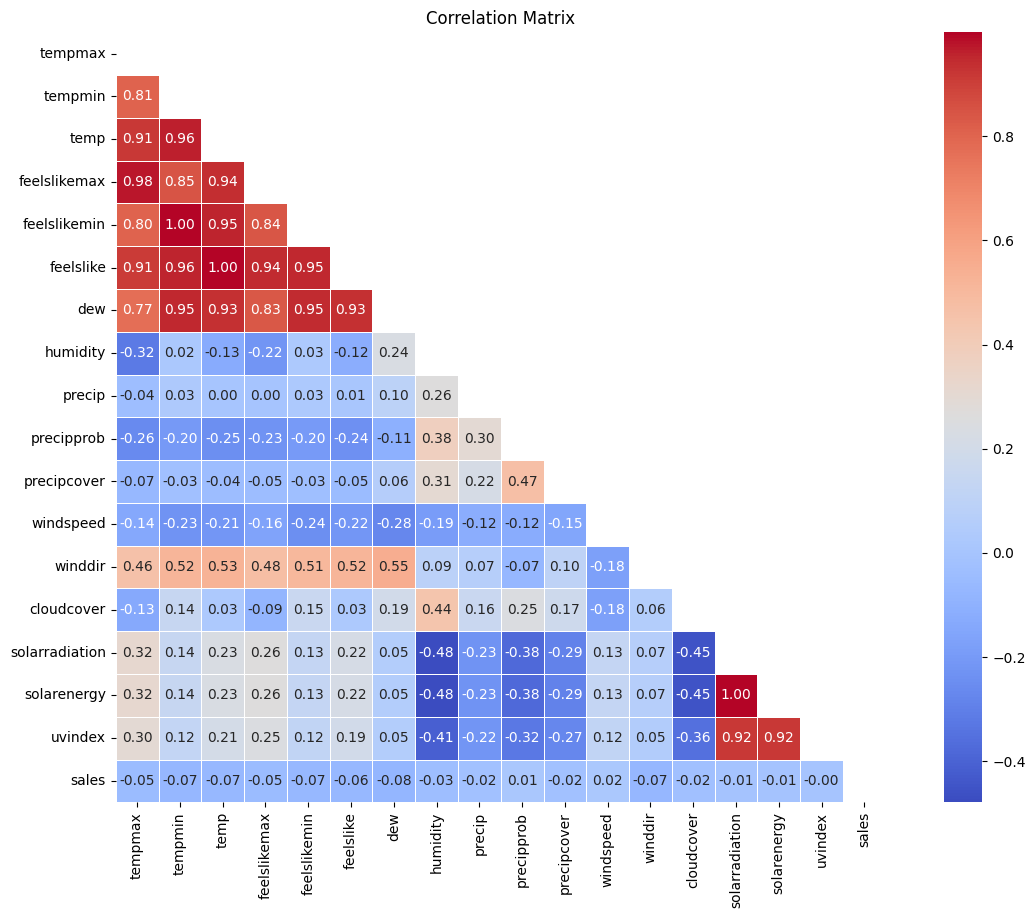

In [ ]:
correlation_matrix = merged_weather_sales_data.corr()
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))  # Adjust the size of the plot
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for VIF calculation
X = merged_weather_sales_data.drop(columns=['sales'])  # Drop the target column
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Display VIF
print(vif_data)

           feature           VIF
0          tempmax   5726.614027
1          tempmin   4926.205784
2             temp  25231.033633
3     feelslikemax   4530.808041
4     feelslikemin   3695.884266
5        feelslike  19102.644836
6              dew   1872.975805
7         humidity    239.685347
8           precip      1.292607
9       precipprob      3.698816
10     precipcover      1.826384
11       windspeed      7.283919
12         winddir      4.519710
13      cloudcover     42.339981
14  solarradiation  43027.990340
15     solarenergy  42775.822570
16         uvindex    248.134427


In [ ]:
merged_st_hd_ol_wt.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'type', 'cluster', 'locale', 'locale_name', 'is_holiday',
       'dcoilwtico', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'windspeed', 'winddir', 'cloudcover', 'solarradiation',
       'solarenergy', 'uvindex'],
      dtype='object')

In [ ]:
selected_columns=['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'type', 'cluster', 'is_holiday','dcoilwtico', 'temp', 'humidity', 'precip', 'windspeed']
df = merged_st_hd_ol_wt[selected_columns]

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday

# Modeling

In [ ]:
df = pd.get_dummies(df, columns=['family', 'type'], drop_first=True)

##Train and Split

In [ ]:
split_date = "2017-01-01"
# Convert the 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

# Split the dataset
train_data = df[df['date'] < split_date]
test_data = df[df['date'] >= split_date]

In [ ]:
# Features and target for training
X_train = train_data.drop(['sales', 'date'], axis=1)
y_train = train_data['sales']

# Features and target for testing
X_test = test_data.drop(['sales', 'date'], axis=1)
y_test = test_data['sales']

In [ ]:
y_train = np.array(y_train)
y_train_pred = np.array(y_train_pred)
y_test = np.array(y_test)
y_test_pred = np.array(y_test_pred)

##XGBoost

In [ ]:
# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 7],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 0.2],
    'min_child_weight': [1, 10]
}

# Initialize the model
xgb_model = XGBRegressor(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=5, scoring='neg_mean_squared_error', cv=5, n_jobs=-1,
                                   verbose=1, random_state=42)

# Fit the model to data
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

# Get the best model
best_xgb_model = random_search.best_estimator_



Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found:  {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


In [ ]:
# Function to calculate confidence intervals
def calculate_confidence_intervals(y_true, y_pred, metric_function, alpha=0.05, n_bootstrap=100):

    metrics = []
    rng = np.random.default_rng(seed=42)
    n_samples = len(y_true)

    for _ in range(n_bootstrap):
        indices = rng.choice(n_samples, n_samples, replace=True)
        y_true_bootstrap = y_true[indices]
        y_pred_bootstrap = y_pred[indices]
        metrics.append(metric_function(y_true_bootstrap, y_pred_bootstrap))

    lower_bound = np.percentile(metrics, alpha / 2 * 100)
    upper_bound = np.percentile(metrics, (1 - alpha / 2) * 100)
    return lower_bound, upper_bound

In [ ]:
# Evaluate metrics on training set
y_train_pred = best_xgb_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

train_metrics = {
    "Metric": ["MSE", "RMSE", "MAE", "R^2"],
    "Value": [train_mse, train_rmse, train_mae, train_r2],
    "Confidence Interval (95%)": [
        calculate_confidence_intervals(y_train, y_train_pred, mean_squared_error),
        calculate_confidence_intervals(y_train, y_train_pred, lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))),
        calculate_confidence_intervals(y_train, y_train_pred, mean_absolute_error),
        calculate_confidence_intervals(y_train, y_train_pred, r2_score),
    ]
}

In [ ]:
# Evaluate metrics on test set
y_test_pred = best_xgb_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

test_metrics = {
    "Metric": ["MSE", "RMSE", "MAE", "R^2"],
    "Value": [test_mse, test_rmse, test_mae, test_r2],
    "Confidence Interval (95%)": [
        calculate_confidence_intervals(y_test, y_test_pred, mean_squared_error),
        calculate_confidence_intervals(y_test, y_test_pred, lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))),
        calculate_confidence_intervals(y_test, y_test_pred, mean_absolute_error),
        calculate_confidence_intervals(y_test, y_test_pred, r2_score),
    ]
}

In [ ]:
# Convert to DataFrame for better presentation
train_df = pd.DataFrame(train_metrics)
test_df = pd.DataFrame(test_metrics)

print("\nTrain Set Metrics:")
print(train_df)

print("\nTest Set Metrics:")
print(test_df)


Train Set Metrics:
  Metric         Value                Confidence Interval (95%)
0    MSE  77185.990386   (67026.76209445554, 87949.83107130368)
1   RMSE    277.823668   (258.8947972222747, 296.5622930223018)
2    MAE     85.307785   (84.96954634491439, 85.60789620245376)
3    R^2      0.930761  (0.921985030840677, 0.9391958000169637)

Test Set Metrics:
  Metric          Value                 Confidence Interval (95%)
0    MSE  135804.148680   (130474.89945404264, 142901.5769203361)
1   RMSE     368.516144     (361.213087453138, 378.0229684861333)
2    MAE     116.972607   (116.1150849014234, 117.88170520042195)
3    R^2       0.926054  (0.9229453620500965, 0.9287538349404761)


In [ ]:
# Just to not re run the hyperparameter tuning
# Results for parameter tuning: Best parameters found:  'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7
# Initialize the XGBoost Regressor
# xgb_model = XGBRegressor(
#     n_estimators=200,  # Number of trees
#     learning_rate=0.1,  # Step size shrinkage
#     max_depth=6,        # Maximum depth of trees
#     subsample=1.0,      # Fraction of samples to use for training each tree
#     colsample_bytree=0.7,  # Fraction of features to use for training each tree
#     random_state=42,
#     eval_metric="rmse"
# )

# # Train the model

# xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# # Make predictions
# y_pred = xgb_model.predict(X_test)

# # Calculate evaluation metrics
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)  # Calculate RMSE
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# print(f"Mean Absolute Error: {mae}")
# print(f"R^2 Score: {r2}")

Mean Squared Error: 177896.95585480012
Root Mean Squared Error (RMSE): 421.78
Mean Absolute Error: 141.2686414577432
R^2 Score: 0.9031346672833687


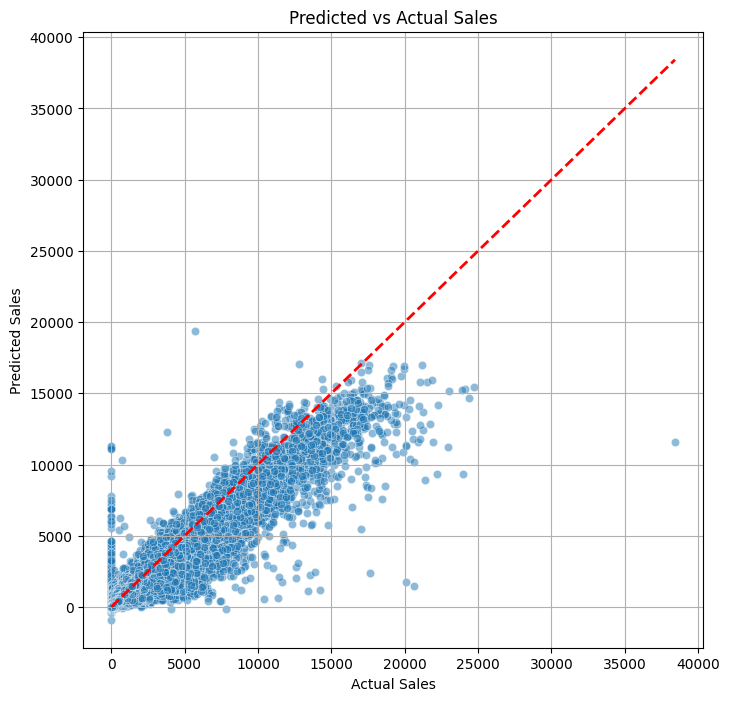

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Perfect prediction line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Predicted vs Actual Sales")
plt.grid()
plt.show()

In [ ]:
# Plotting by date
X_test_with_date = X_test.copy()
X_test_with_date['date'] = df['date'][df['date'] >= split_date]

In [ ]:
# Combine data
results_df = pd.DataFrame({
    'date': X_test_with_date['date'],  # Dates from the test set
    'actual_sales': y_test,
    'predicted_sales': y_test_pred
})

# Sort by date for proper plotting
results_df = results_df.sort_values(by='date')

In [ ]:
# Group by date
results_df_grouped = results_df.groupby('date').agg(
    actual_sales=('actual_sales', 'sum'),
    predicted_sales=('predicted_sales', 'sum')  # Same for predictions
).reset_index()

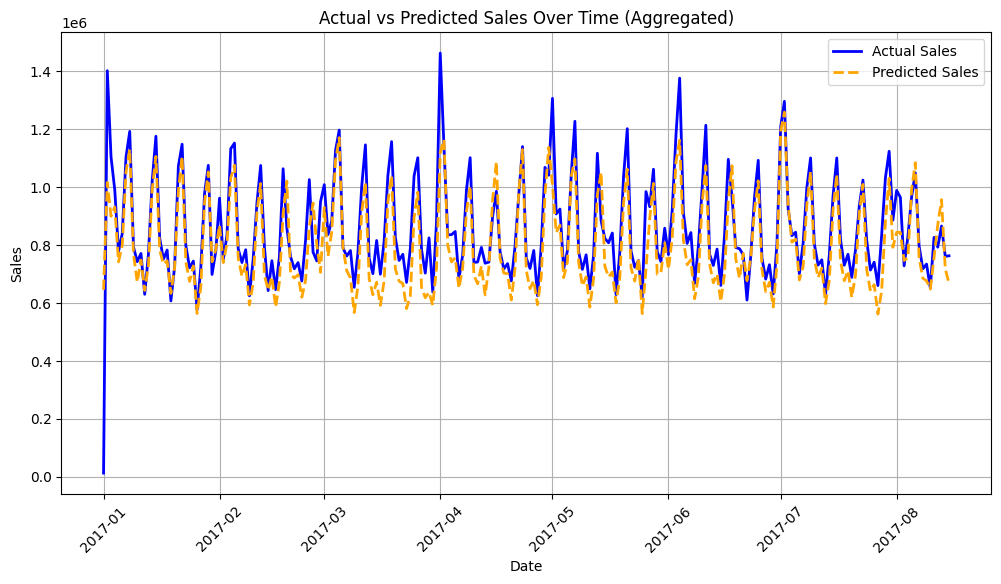

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(results_df_grouped['date'], results_df_grouped['actual_sales'], label='Actual Sales', color='blue', linewidth=2)
plt.plot(results_df_grouped['date'], results_df_grouped['predicted_sales'], label='Predicted Sales', color='orange', linestyle='--', linewidth=2)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Actual vs Predicted Sales Over Time (Aggregated)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

<Figure size 1000x800 with 0 Axes>

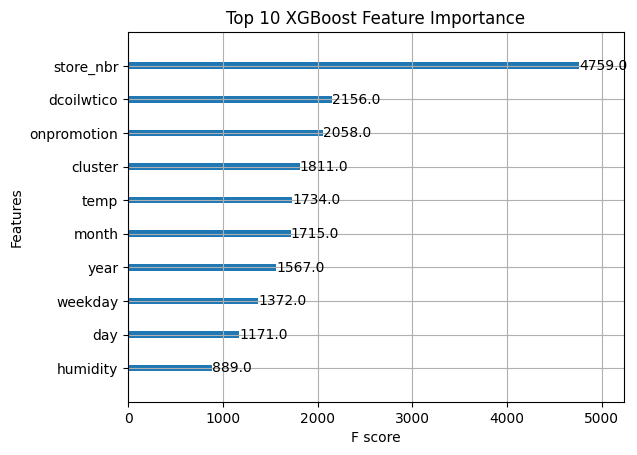

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(best_xgb_model, max_num_features=10)
plt.title('Top 10 XGBoost Feature Importance')
plt.show()

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Linear Regression

In [ ]:
# Initialize the imputer to replace NaNs with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the trained imputer
X_test_imputed = imputer.transform(X_test)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model using the imputed data
lr_model.fit(X_train_imputed, y_train)

# Make predictions on the test set using imputed data
y_pred = lr_model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared (R2): {r2:.2f}")

# Optional: Display coefficients for feature importance
coefficients = pd.DataFrame({
    'Feature': X_train.columns, # Assuming X_train was a pandas DataFrame before imputation
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients:")
print(coefficients)



NameError: name 'SimpleImputer' is not defined

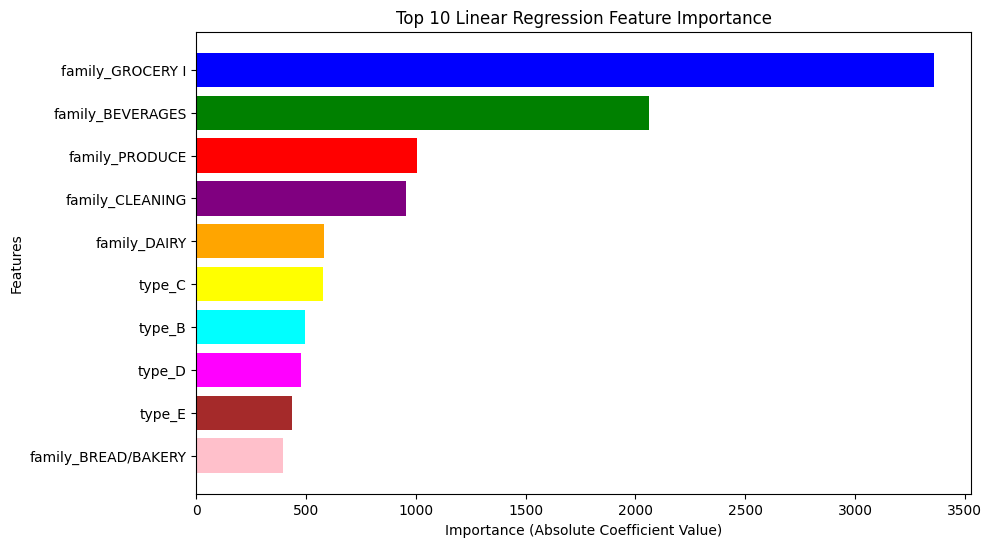

In [ ]:
# Extract feature coefficients and feature names
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  # Ensure X_train is a DataFrame
    'Coefficient': lr_model.coef_
})

feature_importance['Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

top_10_features = feature_importance.head(10)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'pink']  # A list of colors for each bar

# Plot the top 10 feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color=colors)
plt.xlabel('Importance (Absolute Coefficient Value)')
plt.ylabel('Features')
plt.title('Top 10 Linear Regression Feature Importance')
plt.gca().invert_yaxis()
plt.show()



## Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler = RobustScaler()

#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train, y_train)

# Assign the fitted pipeline (which contains the RandomForestRegressor) to rf_model
rf_model = pipe # Assign the pipeline to rf_model

# predictions on train set
y_pred_train = rf_model.predict(X_train) # Use rf_model for predictions

# predictions on test set
y_pred_test = rf_model.predict(X_test) # Use rf_model for predictions

# Now you can use rf_model to make predictions
y_pred = rf_model.predict(X_test)

# predictions on train set
##y_pred = pipe.predict(X_train)

# predictions on test set
##y_pred_test = pipe.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- family_BREAD/BAKERY
- family_CELEBRATION
- family_CLEANING
- family_DAIRY
- family_DELI
- ...


In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 156529.37
Root Mean Squared Error (RMSE): 395.64
Mean Absolute Error (MAE): 109.06
R² Score: 0.91


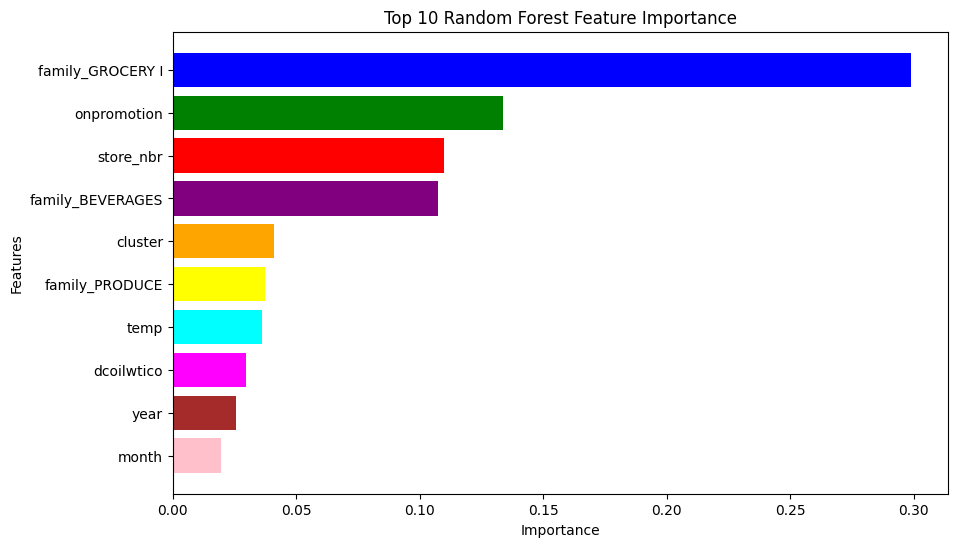

In [ ]:
# Extract feature importances and feature names
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  # Ensure X_train is a DataFrame
    'Importance': rf_model.named_steps['randomforestregressor'].feature_importances_ # Access feature importances from RandomForestRegressor
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

top_10_features = feature_importance.head(10)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'pink']  # A list of colors for each bar

# Plot the top 10 feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color=colors)
plt.xlabel('Importance') # Changed x-axis label
plt.ylabel('Features')
plt.title('Top 10 Random Forest Feature Importance') # Changed title
plt.gca().invert_yaxis()
plt.show()

In [ ]:
##rf = RandomForestRegressor(n_estimators = 30, n_jobs=-1, random_state=1)
##rf.fit(X_train , y_train)

In [ ]:
# Making predictions on the validation set
##val_predictions = rf.predict(X_val)

# Ensure predictions are positive (required for RMSLE)
##val_predictions = np.clip(val_predictions, a_min=0, a_max=None)

# Calculate the RMSLE
##rmsle = np.sqrt(mean_squared_log_error(y_val, val_predictions))
##print(f'RMSLE in set vaidation: {rmsle:.4f}')

## CNN

In [ ]:
##L1 = 0.001
##L2 = 0.1

# Assuming X is a pandas DataFrame or a NumPy array
##num_features = X.shape[1]  # Get the actual number of features in your data

##model = tf.keras.models.Sequential()
# Adjust input_shape to match the actual number of features
##model.add(layers.Dense(64, activation='selu', input_shape=(num_features,)))
##model.add(layers.BatchNormalization())
##model.add(layers.Dense(64, activation='selu'))
##model.add(layers.Dense(1, activation='relu')) #changed selu to relu
#backprop settings
##RMS = tf.keras.optimizers.RMSprop(
    ##learning_rate=0.01,
    ##rho=0.9,
    ##momentum=0.0,
    ##epsilon=1e-07,
    ##centered=False,
    # Removing unsupported argument: jit_compile
    # jit_compile=True,
    ##name="RMSprop"
)


##model.compile(optimizer=RMS, loss='mae', metrics=['mae']) #changed mse to mae

# Assuming 'df' is your DataFrame with features and target
# Replace 'target_column_name' with the actual name of your target column, e.g., 'sales'
# Get the actual name of your target column from the 'df' DataFrame
##target_column_name = 'sales'  # Example: Replace 'sales' with your actual target column name

##y = df[target_column_name].values  # Or df[target_column_name] if it's already a Series
#If your data is in a NumPy array named 'data', and the target is in the last column
#y =

Epoch 1/10
2931/2931 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 1212715.3750 - mae: 497.9818
Epoch 2/10
2931/2931 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 1202061.2500 - mae: 504.4342
Epoch 3/10
2931/2931 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 1192782.2500 - mae: 504.5238
Epoch 4/10
2931/2931 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 1177213.7500 - mae: 502.9790
Epoch 5/10
2931/2931 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 1193040.6250 - mae: 503.2797
Epoch 6/10
2931/2931 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 1198806.6250 - mae: 503.8188
Epoch 7/10
2931/2931 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 1192717.3750 - mae: 503.7941
Epoch 8/10
2931/2931 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 1183232.0000 - mae: 501.8761
Epoch 9/10
2931/2931 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - loss: 1186505.3750 - mae: 502.2296
Epoch 10/10
2931/2931 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 1185551.3750 - mae: 504.1444


<Figure size 640x480 with 0 Axes>

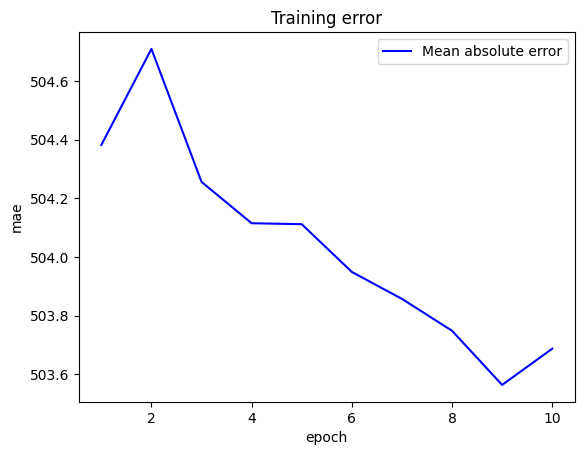

<Figure size 640x480 with 0 Axes>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd # Assuming your data is in a pandas DataFrame
import numpy as np  # Or a NumPy array
import matplotlib.pyplot as plt

L1 = 0.001
L2 = 0.1

# Assuming X is a pandas DataFrame or a NumPy array
num_features = X.shape[1]  # Get the actual number of features in your data

model = tf.keras.models.Sequential()
# Adjust input_shape to match the actual number of features
model.add(layers.Dense(64, activation='selu', input_shape=(num_features,)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='selu'))
model.add(layers.Dense(1, activation='selu'))
#backprop settings
RMS = tf.keras.optimizers.RMSprop(
    learning_rate=0.01,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    # Removing unsupported argument: jit_compile
    # jit_compile=True,
    name="RMSprop"
)


model.compile(optimizer=RMS, loss='mse', metrics=['mae'])

# Assuming 'df' is your DataFrame with features and target
# Replace 'target_column_name' with the actual name of your target column, e.g., 'sales'
# Get the actual name of your target column from the 'df' DataFrame
target_column_name = 'sales'  # Example: Replace 'sales' with your actual target column name

y = df[target_column_name].values  # Or df[target_column_name] if it's already a Series
#If your data is in a NumPy array named 'data', and the target is in the last column
#y = data[:, -1]

history = model.fit(X, y, batch_size=1024, epochs=10, verbose=1)

#graph
loss = history.history['mae']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Mean absolute error')
plt.title('Training error')
plt.xlabel("epoch")
plt.ylabel("mae")
plt.legend()
plt.figure()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming X_test and y_test are your test features and target
# Make predictions
y_pred = model.predict(X_test)

# Print some values from y_pred to check for NaNs
print("Sample values from y_pred:", y_pred[:10])  # Print the first 10 values
print("Number of NaN values in y_pred:", np.isnan(y_pred).sum())

# Replace NaN values with 0
y_pred_cleaned = np.nan_to_num(y_pred)

# Now use the cleaned predictions for evaluation
mse = mean_squared_error(y_test, y_pred_cleaned)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_cleaned)
r2 = r2_score(y_test, y_pred_cleaned)

# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

12642/12642 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step
Sample values from y_pred: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Number of NaN values in y_pred: 115830
Mean Squared Error (MSE): 2067058.45
Root Mean Squared Error (RMSE): 1437.73
Mean Absolute Error (MAE): 480.12
R² Score: -0.13


## ARIMA

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'y_pred' is your NumPy array with predictions
# Replace NaN values with 0
##y_pred_cleaned = np.nan_to_num(y_pred)

# Now use the cleaned predictions for evaluation
##mse = mean_squared_error(y_test, y_pred_cleaned)
##rmse = np.sqrt(mse)
##mae = mean_absolute_error(y_test, y_pred_cleaned)
##r2 = r2_score(y_test, y_pred_cleaned)

#### Export to PDF

In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/ADS-599/Module3/599capstone.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/ADS-599/Module3/599capstone.ipynb to html
[NbConvertApp] Writing 1497650 bytes to /content/drive/MyDrive/ADS-599/Module3/599capstone.html


In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | font

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp "content/drive/MyDrive/ADS-599/Module3/599capstone.ipynb" ./

cp: cannot stat 'content/drive/MyDrive/ADS-599/Module3/599capstone.ipynb': No such file or directory


In [ ]:
!jupyter nbconvert --to PDF "/content/drive/MyDrive/ADS-599/Module3/599capstone.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/ADS-599/Module3/599capstone.ipynb to PDF
/usr/local/lib/python3.10/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  warn(
/usr/local/lib/python3.10/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  warn(
/usr/local/lib/python3.10/dist-packages/nbconvert/filters/datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  warn(
[NbConvertApp] Support files will be in 599capstone_files/
[NbConvertApp] Making directory ./599capstone_files
[NbConvertApp] Making directory ./599capstone_files
[NbConvertApp] Making directory ./599capstone_files
[NbConvertApp] Making directory ./599capstone_files
[NbConvertApp] Making directory ./599capstone_files
[NbConvertApp] Making